In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv")

In [3]:
df.columns =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

age\
sex\
cp: chest pain type\
— Value 1: typical angina\
— Value 2: atypical angina\
— Value 3: non-anginal pain\
— Value 4: asymptomatic\
trestbps: resting blood pressure (in mm Hg on admission to the hospital)\
chol: serum cholestoral in mg/dl\
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)\
restecg: resting electrocardiographic results\
— Value 0: normal\
— Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\
— Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria\
thalach: maximum heart rate achieved\
exang: exercise induced angina (1 = yes; 0 = no)\
oldpeak: ST depression induced by exercise relative to rest\
slope: the slope of the peak exercise ST segment\
— Value 1: upsloping\
— Value 2: flat\
— Value 3: downsloping\
ca: number of major vessels (0-3) colored by flourosopy\
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [5]:
# lets replace the "?" with NaN value
df.replace("?",np.nan,inplace=True)

In [6]:
df1 = df.copy()

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0


In [8]:
# Checking for null values
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
target        0
dtype: int64

In [9]:
df.drop(['ca','thal',],axis=1,inplace=True)

 - I am dropping the column 'ca' and 'thal' as it is least related with the target variable and also almost all the rows are having null values

In [10]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
target        0
dtype: int64

# Handling the Missing values

- trestbps \
We see that maximum people have trestbps of 120 so replacing null values with 120 will be a good choice. \
Also there is one guy who have trestbps value as 0, which is not possible. So lets replace that too with 120.

In [11]:
df.trestbps.value_counts()

120    16
130    15
150     9
110     9
140     9
160     8
122     6
142     5
144     4
170     4
128     4
124     4
134     4
126     4
136     4
132     3
158     3
152     2
155     2
116     2
125     2
138     2
154     2
112     2
104     2
180     2
100     1
114     1
146     1
127     1
156     1
118     1
135     1
96      1
102     1
190     1
178     1
0       1
106     1
172     1
Name: trestbps, dtype: int64

In [12]:
df['trestbps'] = df['trestbps'].replace({'0':np.nan})

In [13]:
df['trestbps'].fillna(df['trestbps'].median(),inplace=True)

- Chol \
 Again we see that there are 49 people who are haing chol value as 0 \
 lets replace the 0 with NaN and then replace all the NaN values with mean of the column.

In [14]:
df.chol.value_counts()

0      49
220     4
258     4
203     4
218     3
       ..
224     1
369     1
311     1
283     1
264     1
Name: chol, Length: 99, dtype: int64

In [15]:
df['chol'] = df['chol'].replace({'0':np.nan})

In [17]:
df['chol'].fillna(df['chol'].mean(),inplace=True)

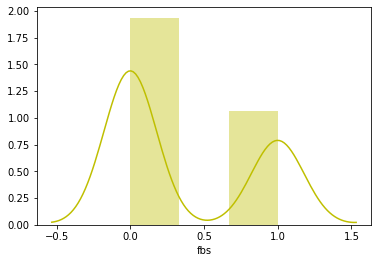

In [18]:
sns.distplot(df['fbs'],color='y')

In [19]:
df['fbs'] = df['fbs'].replace(np.nan, 0)

 - Here in the fbs column we will replace the all seven null values with 0 as most of the people are having fbs as 0

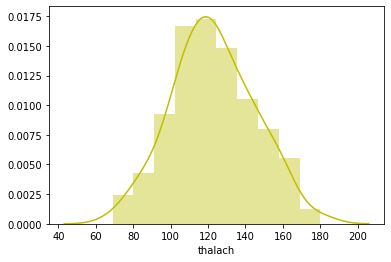

In [20]:
sns.distplot(df['thalach'],color='y')

In [21]:
df['thalach'].fillna(df['thalach'].median(),inplace=True)

In [22]:
df.slope.value_counts()

2    52
3    29
1    16
Name: slope, dtype: int64

In [23]:
df['slope'].fillna(df['slope'].median(),inplace=True)

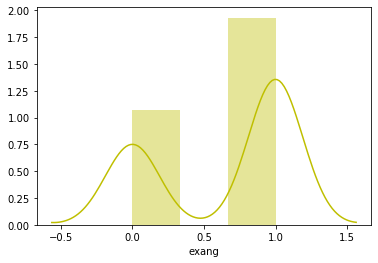

In [24]:
sns.distplot(df['exang'],color='y')

In [25]:
df['exang'].fillna(df['exang'].median(),inplace=True)

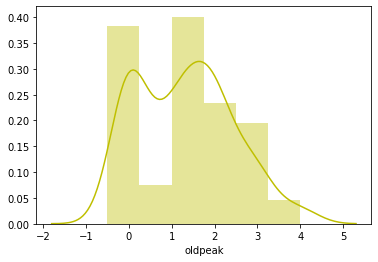

In [26]:
sns.distplot(df['oldpeak'],color='y')

In [27]:
df['oldpeak'].fillna(df['oldpeak'].median(),inplace=True)

In [28]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
target        int64
dtype: object

In [29]:
# Changing the datatype of the columns
df["slope"] = df["slope"].astype('int')
df["thalach"] = df["thalach"].astype('int')
df["fbs"] = df["fbs"].astype('int')
df["chol"] = df["chol"].astype('int')
df["trestbps"] = df["trestbps"].astype('int')
df["oldpeak"] = df["oldpeak"].astype('float')
df["exang"] = df["exang"].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       199 non-null    int64  
 1   sex       199 non-null    int64  
 2   cp        199 non-null    int64  
 3   trestbps  199 non-null    int32  
 4   chol      199 non-null    int32  
 5   fbs       199 non-null    int32  
 6   restecg   199 non-null    int64  
 7   thalach   199 non-null    int32  
 8   exang     199 non-null    int32  
 9   oldpeak   199 non-null    float64
 10  slope     199 non-null    int32  
 11  target    199 non-null    int64  
dtypes: float64(1), int32(6), int64(5)
memory usage: 14.1 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199.0,59.331658,7.827080,35.0,55.0,60.0,64.0,77.0
sex,199.0,0.969849,0.171433,0.0,1.0,1.0,1.0,1.0
cp,199.0,3.502513,0.796928,1.0,3.0,4.0,4.0,4.0
trestbps,199.0,133.326633,15.758879,96.0,126.0,130.0,140.0,190.0
chol,199.0,239.306533,44.838560,100.0,217.0,239.0,254.0,458.0
fbs,199.0,0.341709,0.475479,0.0,0.0,0.0,1.0,1.0
restecg,199.0,0.733668,0.684918,0.0,0.0,1.0,1.0,2.0
thalach,199.0,122.105528,18.910312,69.0,112.0,120.0,130.0,180.0
exang,199.0,0.738693,0.440455,0.0,0.0,1.0,1.0,1.0
oldpeak,199.0,1.362814,0.936426,-0.5,1.0,1.5,2.0,4.0


# Visualisation

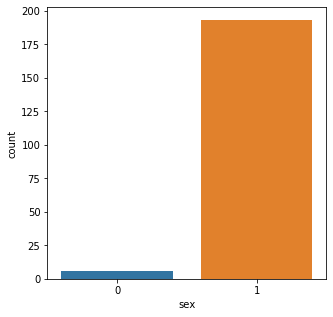

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(df['sex'])
plt.show()

- Lets say 1 as Male an 0 as Female

1    56
0    51
3    42
2    40
4    10
Name: target, dtype: int64


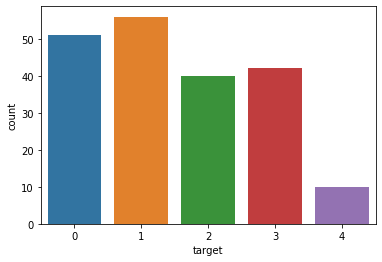

In [33]:
ax = sns.countplot(df["target"])
target_temp = df.target.value_counts()
print(target_temp)

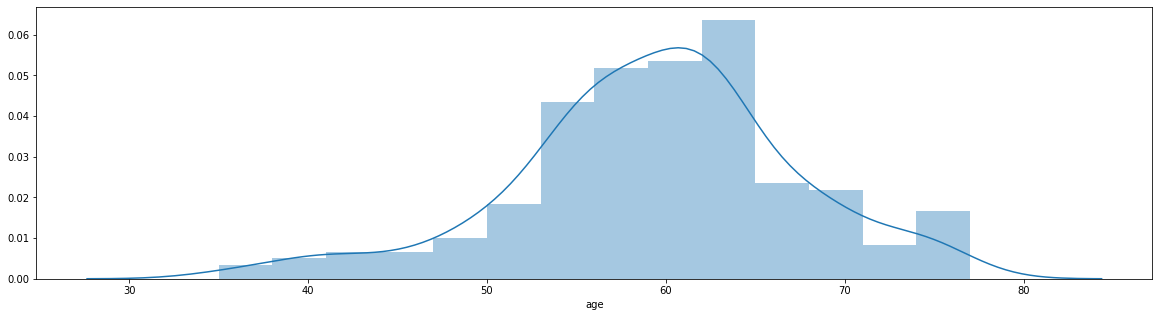

In [34]:
plt.figure(figsize=(20,5))
sns.distplot(df['age'])
plt.show()

 - Maxium of the people are in the range of 55-65 years of age

Text(0.5, 1.0, 'Maximum Heart Rate as per age')

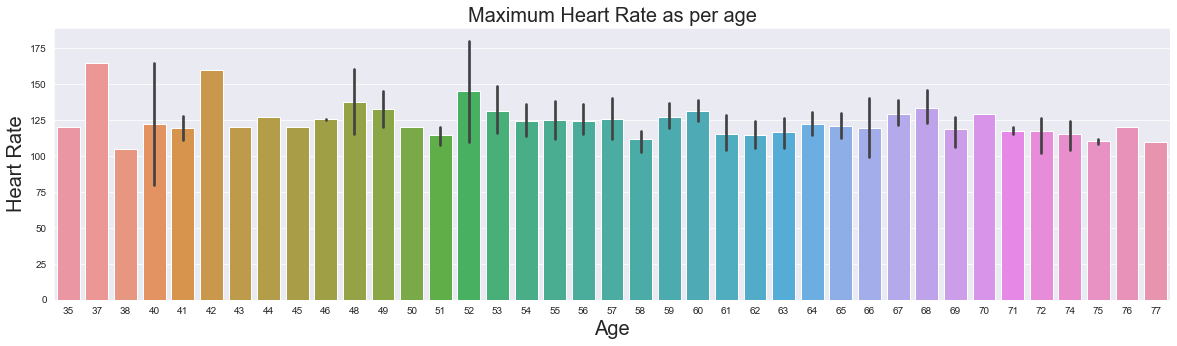

In [35]:
plt.figure(figsize=(20,5))
sns.set_style('darkgrid')
sns.barplot(x='age',y='thalach',data=df)
plt.xlabel('Age',{'fontsize' :20})
plt.ylabel('Heart Rate',{'fontsize':20})
plt.title("Maximum Heart Rate as per age",{'fontsize':20})

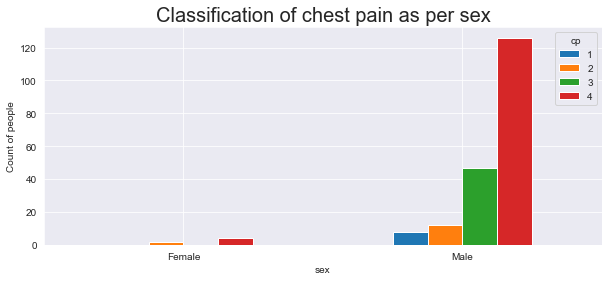

In [36]:
pd.crosstab(df.sex, df.cp).plot(kind='bar',figsize=(10,4))
plt.ylabel('Count of people')
plt.title("Classification of chest pain as per sex",{'fontsize':20})
plt.xticks(ticks=[0,1],rotation=0,labels=['Female', 'Male']);

- cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

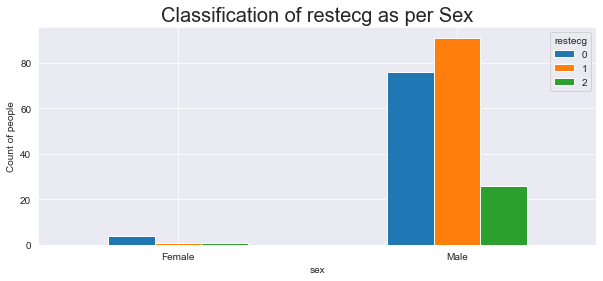

In [37]:
pd.crosstab(df.sex, df.restecg).plot(kind='bar',figsize=(10,4))
plt.ylabel('Count of people');
plt.title("Classification of restecg as per Sex",{'fontsize':20})
plt.xticks(ticks=[0,1],rotation=0,labels=['Female', 'Male']);

restecg: resting electrocardiographic results\
— Value 0: normal\
— Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\
— Value 2: showing probable or definite left ventricular hypertrophy

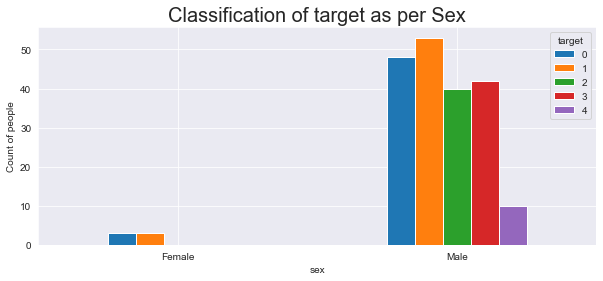

In [38]:
pd.crosstab(df.sex, df.target).plot(kind='bar',figsize=(10,4))
plt.ylabel('Count of people')
plt.title("Classification of target as per Sex",{'fontsize':20})
plt.xticks(ticks=[0,1],rotation=0,labels=['Female', 'Male']);

Text(0.5, 1.0, 'Avg Cholestrol Level as per age')

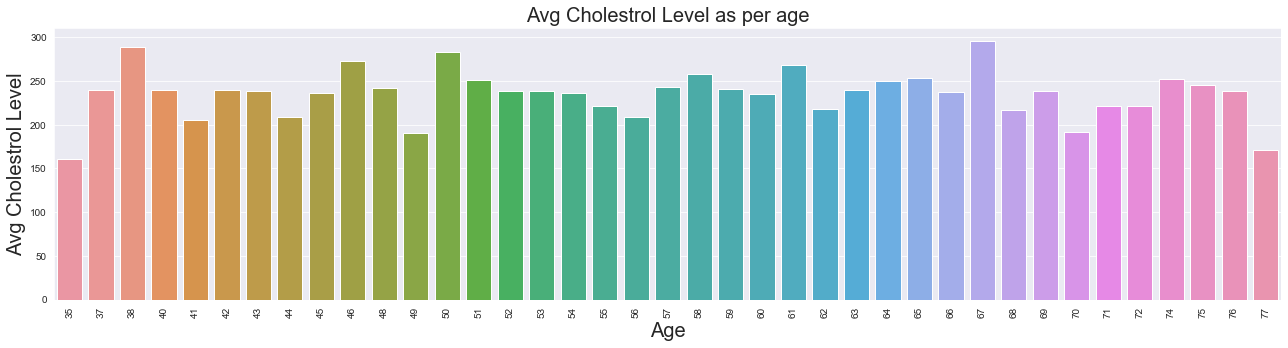

In [39]:
Filter1=df.age!=0
df2=df[Filter1]
age = list(df2.age.unique())
cholestrol = []
for i in age:
    x=df2[df2.age==i]
    cholestrol.append(sum(x['chol'])/len(x))
df3=pd.DataFrame({'Age':age,'Cholestrol_Lvl':cholestrol})

new_index=df3.Cholestrol_Lvl.sort_values(ascending=False).index.values
sorted_data=df3.reindex(new_index)
plt.figure(figsize=(22,5))
ax=sns.barplot(x=sorted_data.Age,y=sorted_data.Cholestrol_Lvl,palette=None)

plt.xticks(rotation=90)
plt.xlabel('Age',{'fontsize':20})
plt.ylabel('Avg Cholestrol Level',{'fontsize':20})
plt.title('Avg Cholestrol Level as per age',{'fontsize':20})

- According to the research the healthy serum cholestrol level is < 200 mg/dL\
- But here we can see that most of the people are having serum cholestrol which is a matter of concern

Text(0.5, 1, 'Presence of heart disease')

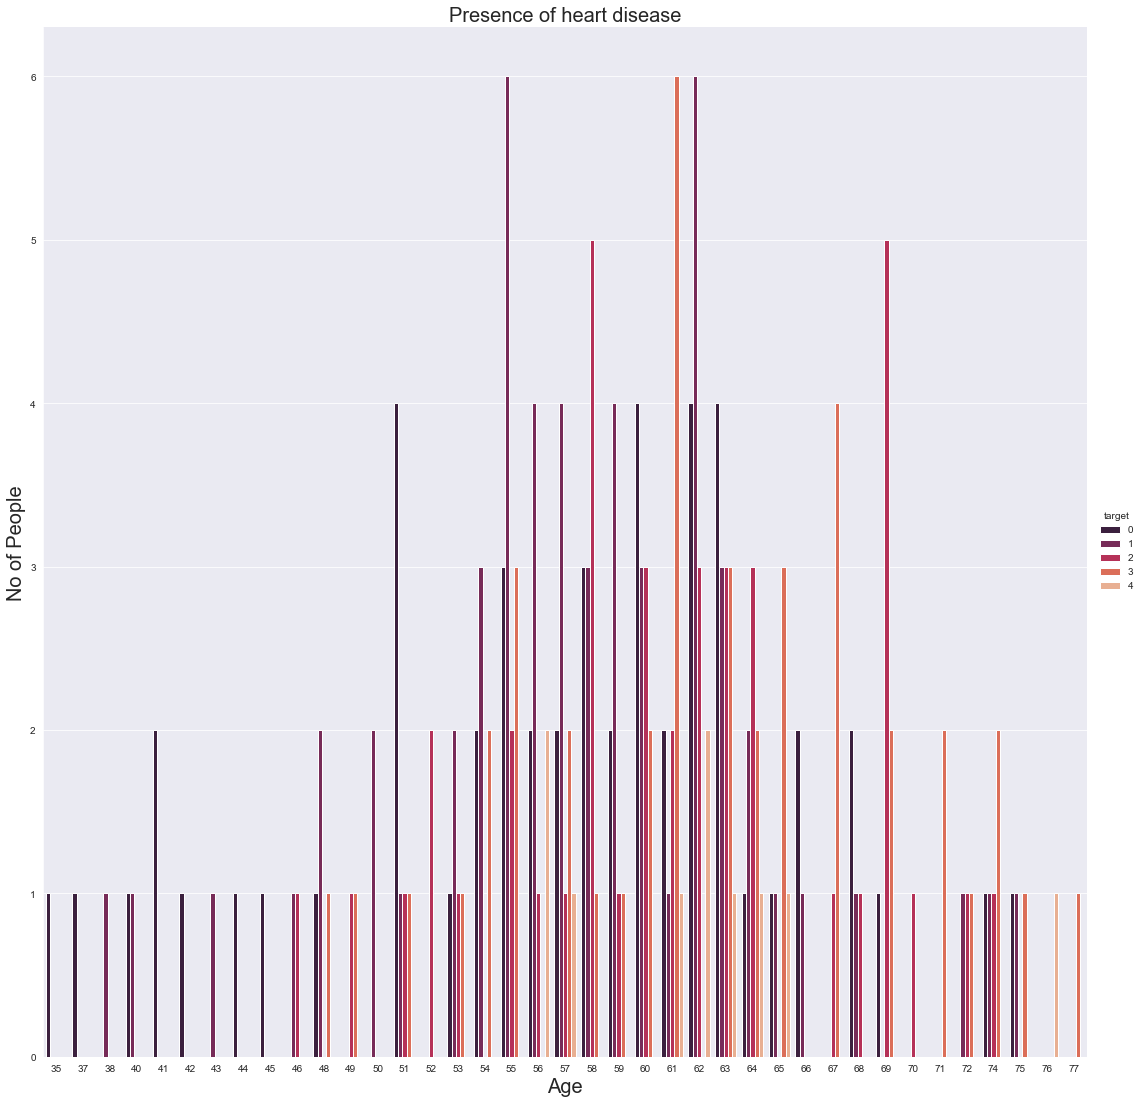

In [40]:
sns.catplot('age', kind='count', hue='target', data=df, palette='rocket', height=15,aspect=1)
plt.xlabel('Age',{'fontsize' :20})
plt.ylabel('No of People',{'fontsize':20})
plt.title("Presence of heart disease",{'fontsize':20})

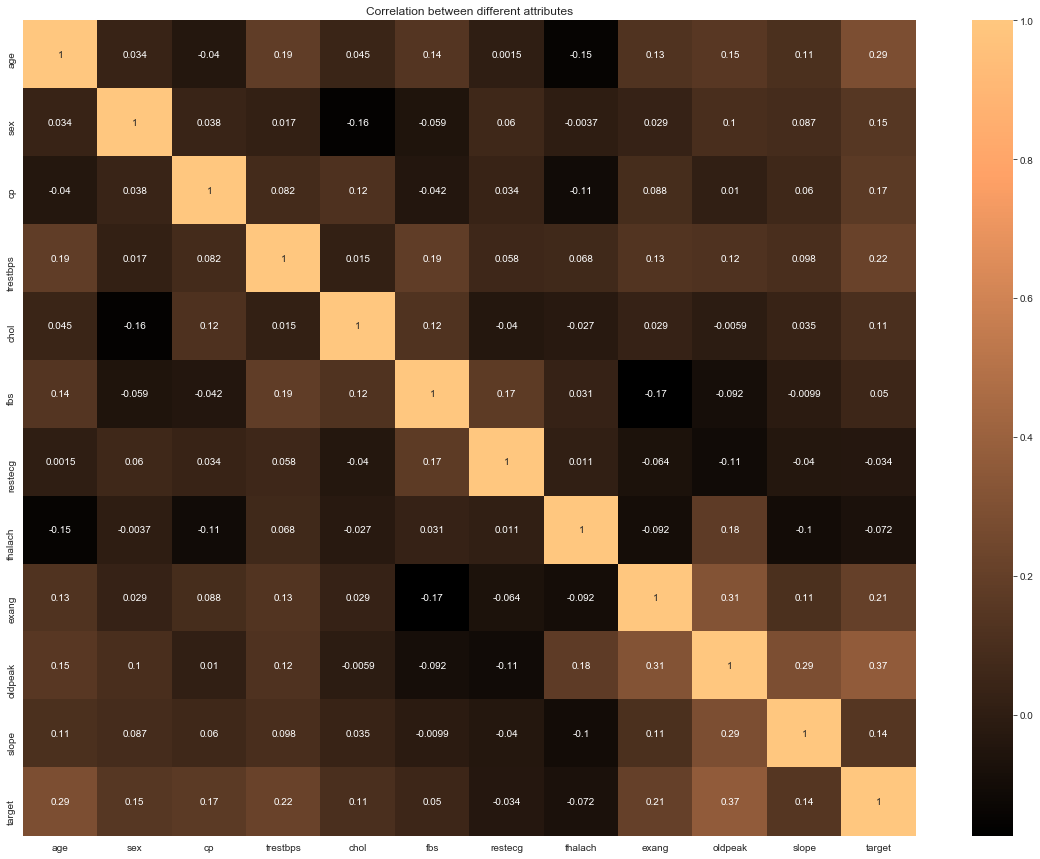

In [41]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),vmax=1,annot=True,cmap='copper')
plt.title("Correlation between different attributes")
plt.show()

- Target is positively correlated with [Age, trestbps, exang, oldpeak, cp]
- cp(Chest pain) is positively correlated with chol. 
- Thalach is negatively correlated with age which means the heart rate dosent much depends on the age.
- trestbps is positevely correlated with fbs, age, exang and also oldpeak. 
- exang and fbs are negatively correlated where as (exang,oldpeak) and (thalach,oldpeak) are highly correlated.
- Age and oldpeak also have positive correlation

# Outlier Detection for columns having continious value

In [42]:
df2 = df.drop(['fbs'],axis=1)

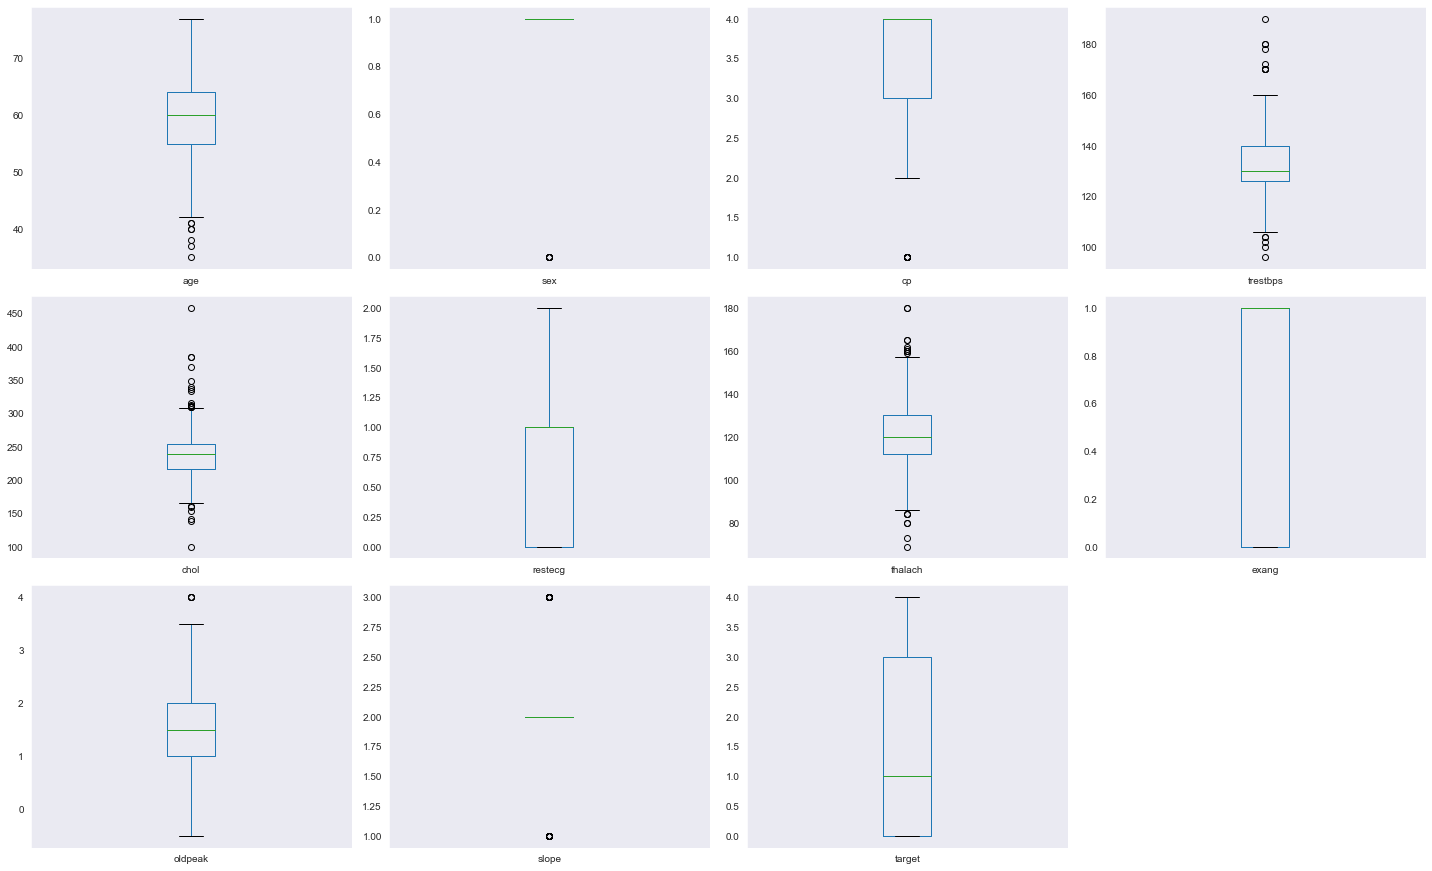

In [43]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df2.columns.values)):
                       plt.subplot(4,4,i+1)
                       df2.boxplot(col)
                       plt.grid()
                       plt.tight_layout()

In [44]:
df2.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,1,127,0,0.0,2,0
1,60,1,4,132,218,1,140,1,1.5,3,2
2,55,1,4,142,228,1,149,1,2.5,1,1
3,66,1,3,110,213,2,99,1,1.3,2,0
4,66,1,3,120,239,1,120,0,-0.5,1,0


# Removing outliers using zscore

In [45]:
qwe = ['age','trestbps','chol','thalach','oldpeak','cp']
for col in qwe:
    col_zscore = col + '_zscore'
    df2[col_zscore] = (df2[col] - df2[col].mean())/df2[col].std(ddof=0)

In [46]:
df2.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target,age_zscore,trestbps_zscore,chol_zscore,thalach_zscore,oldpeak_zscore,cp_zscore
0,44,1,4,130,209,1,127,0,0.0,2,0,-1.963737,-0.211628,-0.677608,0.259478,-1.459007,0.625831
1,60,1,4,132,218,1,140,1,1.5,3,2,0.085604,-0.084396,-0.476382,0.948668,0.146869,0.625831
2,55,1,4,142,228,1,149,1,2.5,1,1,-0.554815,0.551768,-0.252797,1.425799,1.217453,0.625831
3,66,1,3,110,213,2,99,1,1.3,2,0,0.854106,-1.483955,-0.588174,-1.224930,-0.067248,-0.632152
4,66,1,3,120,239,1,120,0,-0.5,1,0,0.854106,-0.847792,-0.006854,-0.111624,-1.994298,-0.632152


In [47]:
df_no_outliers = df2[(df2.age_zscore>-3) & (df2.age_zscore<3) & (df2.trestbps_zscore>-3)
                     & (df2.trestbps_zscore<3) & (df2.thalach_zscore>-3) &( df2.thalach_zscore<3)
                     & (df2.chol_zscore>-3) & (df2.chol_zscore<3)
                     & (df2.oldpeak_zscore>-3) & (df2.oldpeak_zscore<3) & (df2.cp_zscore>-3) & (df2.cp_zscore<3)]
df_no_outliers.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target,age_zscore,trestbps_zscore,chol_zscore,thalach_zscore,oldpeak_zscore,cp_zscore
0,44,1,4,130,209,1,127,0,0.0,2,0,-1.963737,-0.211628,-0.677608,0.259478,-1.459007,0.625831
1,60,1,4,132,218,1,140,1,1.5,3,2,0.085604,-0.084396,-0.476382,0.948668,0.146869,0.625831
2,55,1,4,142,228,1,149,1,2.5,1,1,-0.554815,0.551768,-0.252797,1.425799,1.217453,0.625831
3,66,1,3,110,213,2,99,1,1.3,2,0,0.854106,-1.483955,-0.588174,-1.224930,-0.067248,-0.632152
4,66,1,3,120,239,1,120,0,-0.5,1,0,0.854106,-0.847792,-0.006854,-0.111624,-1.994298,-0.632152


In [48]:
df_no_outliers.shape

(183, 17)

In [49]:
df2.shape

(199, 17)

 - Almost 16 rows have been removed

In [51]:
df_no_outliers.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,target,age_zscore,trestbps_zscore,chol_zscore,thalach_zscore,oldpeak_zscore,cp_zscore
0,44,1,4,130,209,1,127,0,0.0,2,0,-1.963737,-0.211628,-0.677608,0.259478,-1.459007,0.625831
1,60,1,4,132,218,1,140,1,1.5,3,2,0.085604,-0.084396,-0.476382,0.948668,0.146869,0.625831
2,55,1,4,142,228,1,149,1,2.5,1,1,-0.554815,0.551768,-0.252797,1.425799,1.217453,0.625831
3,66,1,3,110,213,2,99,1,1.3,2,0,0.854106,-1.483955,-0.588174,-1.224930,-0.067248,-0.632152
4,66,1,3,120,239,1,120,0,-0.5,1,0,0.854106,-0.847792,-0.006854,-0.111624,-1.994298,-0.632152


 - Lets drop the zscore column as we dont need it now for model building

In [82]:
X= df_no_outliers.drop(['age_zscore','trestbps_zscore','chol_zscore','thalach_zscore','oldpeak_zscore','cp_zscore'], axis=1)

 - Lets see which all column are highly correlated with the target variable and which all should we consider for model building.

In [83]:
print(X.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.379509
age         0.285805
exang       0.247157
cp          0.213713
trestbps    0.171760
sex         0.158280
slope       0.152627
chol        0.133373
thalach     0.102371
restecg     0.041108
Name: target, dtype: float64


 - We can see tht column 'restecg' is least correlated with the target column so lets drop it.

In [87]:
X.drop(['restecg','target'],axis=1,inplace=True)

In [88]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,183.0,59.327869,7.733305,37.0,55.0,60.0,63.5,77.0
sex,183.0,0.967213,0.178567,0.0,1.0,1.0,1.0,1.0
cp,183.0,3.612022,0.617748,2.0,3.0,4.0,4.0,4.0
trestbps,183.0,133.256831,15.515488,96.0,125.5,130.0,140.0,180.0
chol,183.0,238.464481,37.977981,142.0,218.0,239.0,253.0,369.0
thalach,183.0,121.475410,17.934196,73.0,112.0,120.0,130.0,165.0
exang,183.0,0.748634,0.434989,0.0,0.5,1.0,1.0,1.0
oldpeak,183.0,1.337158,0.950036,-0.5,0.5,1.5,2.0,4.0
slope,183.0,2.065574,0.464173,1.0,2.0,2.0,2.0,3.0


In [89]:
y= df_no_outliers.target

In [90]:
X.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope
0,44,1,4,130,209,127,0,0.0,2
1,60,1,4,132,218,140,1,1.5,3
2,55,1,4,142,228,149,1,2.5,1
3,66,1,3,110,213,99,1,1.3,2
4,66,1,3,120,239,120,0,-0.5,1


# Model Building

 - Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
max_acc_score=0
for r_state in range(42,200):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_state)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, pred_rf)
    if acc_score > max_acc_score:
        max_acc_score = acc_score
        final_r_state = r_state
print("Maximum Accuracy score is at random_sate", final_r_state," is ",max_acc_score*100)

Maximum Accuracy score is at random_sate 47  is  45.94594594594595


 - Support Vector Machine

In [62]:
from sklearn.svm import SVC
from sklearn import metrics
max_acc_score=0
for r_state in range(42,200):
    X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=r_state)
    svm = SVC()
    svm.fit(X_train1,y_train1)
    pred_svc = svm.predict(X_test1)
    acc_score = metrics.accuracy_score(y_test1, pred_svc)
    if acc_score > max_acc_score:
        max_acc_score = acc_score
        final_r_state = r_state
print("Maximum Accuracy score is at random_sate ", final_r_state," is ",max_acc_score*100)

Maximum Accuracy score is at random_sate  168  is  38.18181818181819


 - K Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
max_acc_score=0
for r_state in range(42,200):
    X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=r_state)
    kn = KNeighborsClassifier(n_neighbors = 5)
    kn.fit(X_train2,y_train2)
    pred_kn = kn.predict(X_test2)
    acc_score = metrics.accuracy_score(y_test2, pred_kn)
    if acc_score > max_acc_score:
        max_acc_score = acc_score
        final_r_state = r_state
print("Maximum Accuracy score is at random_sate ", final_r_state," is ",max_acc_score*100)

Maximum Accuracy score is at random_sate  46  is  40.0


 - Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
max_acc_score=0
for r_state in range(42,200):
    X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.3,random_state=r_state)
    model= GaussianNB()
    model.fit(X_train3,y_train3)
    pred_nb = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test3, pred_nb)
    if acc_score > max_acc_score:
        max_acc_score = acc_score
        final_r_state = r_state
print("Maximum Accuracy score is at random_sate ", final_r_state," of ",max_acc_score*100)

Maximum Accuracy score is at random_sate  161  of  32.72727272727273


In [95]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [96]:
# Lets save the model having highest accuracy using joblib 
from sklearn.externals import joblib
joblib.dump(rf,'rf_heartdiseases.pkl')

['rf_heartdiseases.pkl']